In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import KFold, cross-validation
from sklearn.linear_model import LogisticRegression
#import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
#import ROC_Curve, and pyplot
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv("data.csv")
data = data.drop(columns = ["Unnamed: 32"])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Normalisation

In [79]:
data.diagnosis = [ 0 if each == 'B' else 1 for each in data.diagnosis ]
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Splitting Data
***Splitting data into a training data set and a testing data set***

In [101]:
x = data.drop(['diagnosis'], axis = 1)
y = data.diagnosis.values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 42)
x_train = x_train
x_test = x_test
y_train = y_train
y_test = y_test
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (113, 31)
x test:  (456, 31)
y train:  (113,)
y test:  (456,)


In [109]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [111]:
y_pred = LR.predict(x_test)
y_prob = LR.predict_proba(x_test)[:,1]

### Model Evaluation

In [116]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification matrix: ', classification_report(y_test, y_pred))
print('ROC-AUC Score: ', roc_auc_score(y_test, y_prob))

Accuracy:  0.918859649122807
Confusion Matrix: 
 [[274  16]
 [ 21 145]]
Classification matrix:                precision    recall  f1-score   support

           0       0.93      0.94      0.94       290
           1       0.90      0.87      0.89       166

    accuracy                           0.92       456
   macro avg       0.91      0.91      0.91       456
weighted avg       0.92      0.92      0.92       456

ROC-AUC Score:  0.9637307852098046


In [118]:
print('Coefficients: ', LR.coef_)
print('Intercept: ', LR.intercept_)

Coefficients:  [[-1.13271136e-08 -8.79945333e-03 -1.59323443e-02 -5.31727762e-02
  -2.01984881e-02 -9.49790638e-05 -1.64144962e-05  8.83923247e-05
   3.84820255e-05 -1.77162554e-04 -6.88898020e-05  1.53247297e-05
  -1.06425761e-03  4.54477721e-04  3.64486862e-02 -7.04453902e-06
  -5.02421274e-06  4.00130901e-06 -3.68125530e-06 -1.66160363e-05
  -2.94100786e-06 -9.12136904e-03 -1.98471569e-02 -5.46666984e-02
   2.92889424e-02 -1.20541512e-04  2.95093051e-05  1.58353588e-04
   2.98074173e-05 -2.50131993e-04 -7.18433957e-05]]
Intercept:  [-0.00112941]


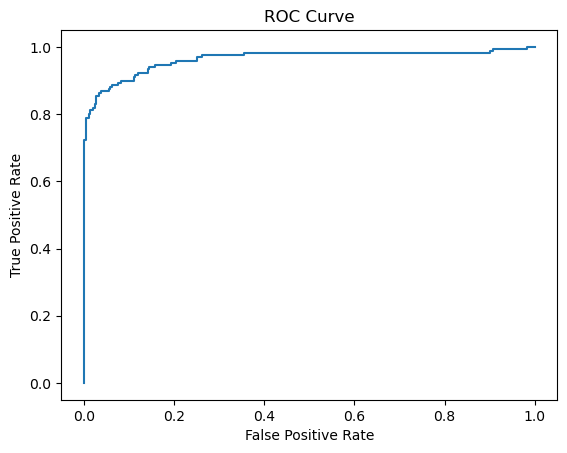

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()